In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [6]:
def MAD(block1, block2):
    diff = np.absolute(block1-block2)
    out = diff.mean()
    return out
def full_block_search(current_frame, reference_frame, x0, y0, p, N):
    current_block = current_frame[y0-int(N/2):y0+int(N/2), x0-int(N/2):x0+int(N/2)]
#     plt.imshow(current_block, cmap='gray')
    min_mad = np.inf
    best_block = None
    u = None
    v = None
    for i in range(-p, p):
        for j in range(-p, p):
            x = x0 + i
            y = y0 + j
            if x-int(N/2) < 0 or x+int(N/2) > current_frame.shape[0]:
                continue
            if y-int(N/2) < 0 or y+int(N/2) > current_frame.shape[1]:
                continue
            reference_block = reference_frame[y-int(N/2):y+int(N/2), x-int(N/2):x+int(N/2)]
            mad = MAD(current_block, reference_block)
            if mad < min_mad:
                best_block = reference_block
                min_mad = mad
                u = i
                v = j
#     plt.imshow(best_block, cmap='gray')
    return u, v

(256, 256)

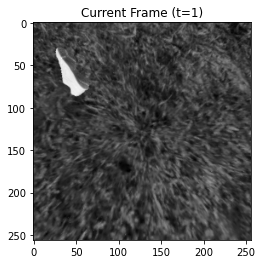

In [7]:
current_frame = cv2.imread('image_sequence/rgba_00001.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(current_frame, cmap='gray')
plt.title("Current Frame (t=1)" )
current_frame.shape

(256, 256)

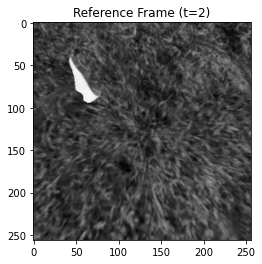

In [8]:
reference_frame = cv2.imread('image_sequence/rgba_00002.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(reference_frame, cmap='gray')
plt.title("Reference Frame (t=2)" )
current_frame.shape

In [9]:
x0 = 40
y0 = 60
N = 16
p = 50
u,v = full_block_search(current_frame, reference_frame, x0=x0, y0=y0, p=p, N=N)
x = x0 + u
y = y0 + v

In [14]:
diff = current_frame[y0-int(N/2):y0+int(N/2), x0-int(N/2):x0+int(N/2)] - reference_frame[y0-int(N/2):y0+int(N/2), x0-int(N/2):x0+int(N/2)]
print('the difference between current frame and motion compensated reference frame in the selected block', np.absolute(diff).sum())


the difference between current frame and motion compensated reference frame in the selected block 34509


In [15]:

diff = current_frame[y0-int(N/2):y0+int(N/2), x0-int(N/2):x0+int(N/2)] - reference_frame[y-int(N/2):y+int(N/2), x-int(N/2):x+int(N/2)]
print('the difference between current frame and motion compensated reference frame in the selected block', np.absolute(diff).sum())


the difference between current frame and motion compensated reference frame in the selected block 19382
